<a href="https://colab.research.google.com/github/VMVoron/ITMO/blob/main/Time_series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ временных рядов (по материалам ВШЦК ИТМО)

Анализ временных рядов позволяет изучить показатели во времени. Временной ряд — это числовые значения статистического показателя, расположенные в хронологическом порядке.

## Составляющие временного ряда



**Тренд** - плавное, долгосрочное изменение уровня ряда \\
**Сезонность** - циклические изменения уровня ряда с постоянным периодом (например, ежемесячному потреблению электроэнергии соответствует период в 12 месяцев) \\
**Цикл** - изменение уровня ряда с переменным периодом (например, экономические циклы, периоды солнечной активности 5-7 лет и т.п) \\
**Шум** - непрогнозируемая, случайная компонента ряда

##Прогнозирование временного ряда



Под прогнозированием ряда понимается построение (моделирование) такой функции f, \\
которая на основе значений временного ряда $y_{1}, y_{2}, ... y_{t}$ \\
и дополнительного параметра $h$ выдает прогнозное значение ряда для точек $(t+h)$ \\
$f(y_{1}, y_{2}, ... y_{t}, h) = \hat{y}_{t+h} ,$ \\
где параметр $h$ - это значение в интервале от $1$ до $H$, где $H$ - горизонт планирования

##Модели временного ряда




Модели временного ряда делятся на аддитивные, мультипликативные и смешанные \
Пусть $u_{t}$ - трендовая составляющая \
$s_{t}$ - сезонная составляющая \
$e_{t}$ - случайная составляющая \

**Аддитивная модель** \\
$y_{t} = u_{t}+s_{t}+e_{t} $

**Мультипликативная модель** \\
$y_{t} = u_{t}*s_{t}*e_{t} $

## Метрики

**Метрика** - функция для определения расстояния между двумя элементами множества

**Ошибка прогноза в момент времени $t$** - это разность между
предсказанным и
реальным значением переменной в момент времени $t$. \
$e_{t} = \hat{y}_{t} - y_{t}, $ \
где $\hat{y}_{t}$ - предсказанное значение, $y_{t}$ - реальное значение переменной

## Метрики качества

MAE (mean absolute error - средняя абсолютная ошибка)

$MAE = \frac{\sum_{t=1}^{n} |у|_{t}}{n} $


MSE (mean squared error - среднеквадратическая ошибка)

$MSE = \frac{\sum_{t=1}^{n} {e^2}_{t}}{n} $

MAPE (mean absolute percentage error - средняя абсолютная процентная ошибка)


$MAPE= 100 \% *\frac{\sum_{t=1}^{n} |{ \frac{e_{t}}{y_{t}} |}}{n} $

## Метод скользящего среднего (Simple moving average)

### SMA offline

In [614]:
 # import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [615]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/DPO/quiz_5_2_2_data.csv',   header=None)

#view the dataset
data.head()

,0,1
0,1,34
1,2,32
2,3,37
3,4,33
4,5,38


In [616]:
data.columns

Int64Index([0, 1], dtype='int64')

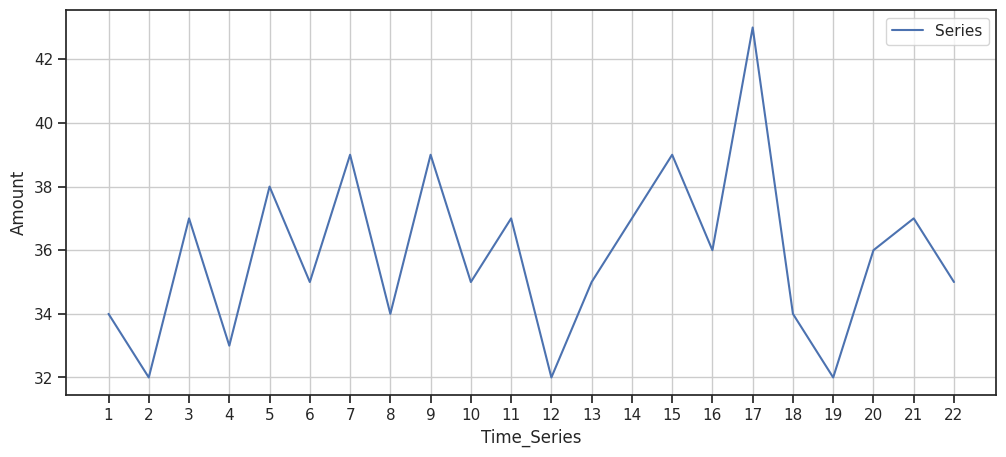

In [617]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.set(style="ticks")
sns.lineplot( x = data[0],
             y = data[1],
             label = 'Series')

plt.xlabel( 'Time_Series')

# setting customized ticklabels for x axis
pos = data[0]
lab = data[0]

plt.xticks( pos, lab)
plt.ylabel('Amount')
plt.grid()
plt.show()

Для вычислений сглаженных значений методом SMA offline используется формула $s_i = \frac{1}{2k+1} \sum_{j=-k}^{k} y_{i+j}$, \\
где $y_{i}$ - значение исходного ряда, $s_{i}$ - значение сглаженного ряда, $2k+1$ - ширина окна

Вычислим сглаженное значение, соответствующее пятому элементу исходного ряда в случае метода SMA offline с шириной окна = 3. Сначала найдем $k$ из соотношения \\
$ 3 = 2k+1 $ \\
Откуда $ k = 1 $ \\

тогда  $s_2 = \frac{1}{3} \sum_{j=-1}^{1} y_{2+j} = \frac{y_{1}+y_{2}+y_{3}}{3} = \frac{34+32+37}{3} \approx 34.33 $,

тогда  $s_5 = \frac{1}{3} \sum_{j=-1}^{1} y_{5+j} = \frac{y_{4}+y_{5}+y_{6}}{3} = \frac{33+38+35}{3} \approx 35.33 $,

shift(periods=-(len_window//2)) - означает сдвиг

In [618]:
len_window = 3

In [619]:
data[f'{len_window}day_rolling_avg_offline'] = data[1].rolling(len_window).mean().shift(periods=-(len_window//2))

In [620]:
len_window = 7

In [621]:
data[f'{len_window}day_rolling_avg_offline'] = data[1].rolling(len_window ).mean().shift(periods=-(len_window//2))

In [622]:
data

,0,1,3day_rolling_avg_offline,7day_rolling_avg_offline
0,1,34,NaN,NaN
1,2,32,34.333333,NaN
2,3,37,34.000000,NaN
3,4,33,36.000000,35.428571
4,5,38,35.333333,35.428571
5,6,35,37.333333,36.428571
6,7,39,36.000000,36.142857
7,8,34,37.333333,36.714286
8,9,39,36.000000,35.857143
9,10,35,37.000000,35.857143


Вычислите скользящее среднее с помощью pandas.DataFrame.rolling.mean().

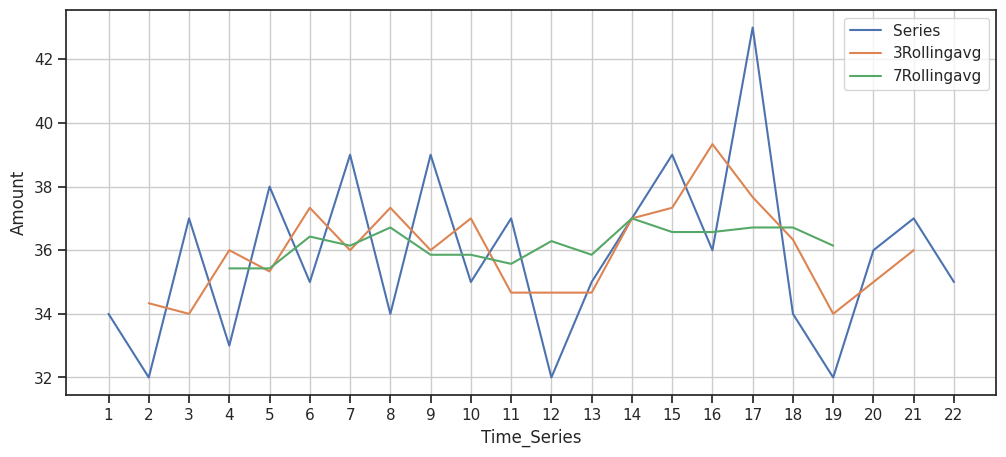

In [623]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.set(style="ticks")
sns.lineplot( x = data[0],
             y = data[1],
             label = 'Series')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['3day_rolling_avg_offline'] ,
			label = '3Rollingavg')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['7day_rolling_avg_offline'] ,
			label = '7Rollingavg')

# setting customized ticklabels for x axis
pos = data[0]
lab = data[0]

plt.xticks( pos, lab)
plt.xlabel( 'Time_Series')
plt.ylabel('Amount')
plt.grid()
plt.show()


### SMA online

Для вычислений сглаженных значений методом SMA online используется формула $s_i = \frac{1}{n+1} \sum_{j=-n}^{0} y_{i+j}$, \\
где $y_{i}$ - значение исходного ряда, $s_{i}$ - значение сглаженного ряда, $n+1$ - ширина окна

Вычислим сглаженное значение, соответствующее пятому элементу исходного ряда в случае метода SMA online с шириной окна = 3. Сначала найдем $k$ из соотношения \\
$ 3 = n +1 $ \\
Откуда $ n = 2 $ \\

тогда  $s_5 = \frac{1}{3} \sum_{j=-2}^{0} y_{5+j} = \frac{y_{3}+y_{4}+y_{5}}{3} = \frac{34+32+37}{3} \approx 36 $,

shift() не используется

In [624]:
len_window = 3
data[f'{len_window}day_rolling_avg_online'] = data[1].rolling(len_window).mean()

In [625]:
data

,0,1,3day_rolling_avg_offline,7day_rolling_avg_offline,3day_rolling_avg_online
0,1,34,NaN,NaN,NaN
1,2,32,34.333333,NaN,NaN
2,3,37,34.000000,NaN,34.333333
3,4,33,36.000000,35.428571,34.000000
4,5,38,35.333333,35.428571,36.000000
5,6,35,37.333333,36.428571,35.333333
6,7,39,36.000000,36.142857,37.333333
7,8,34,37.333333,36.714286,36.000000
8,9,39,36.000000,35.857143,37.333333
9,10,35,37.000000,35.857143,36.000000


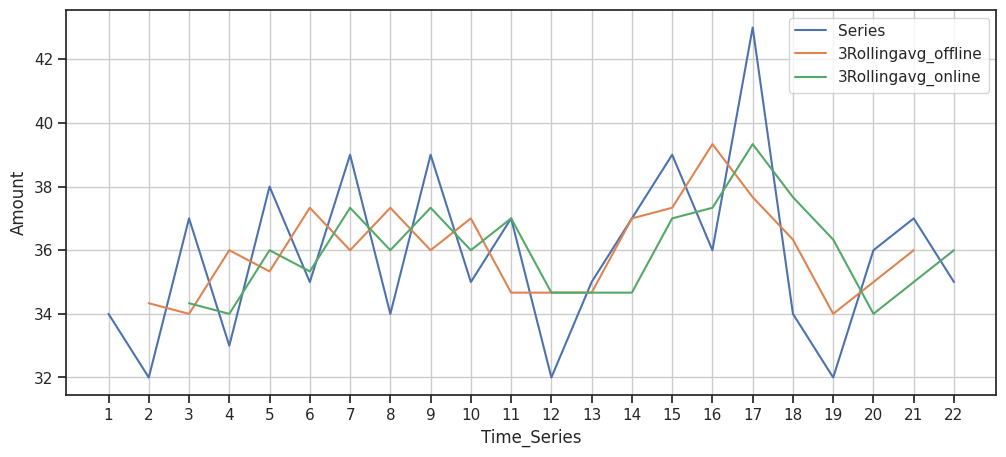

In [626]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.set(style="ticks")
sns.lineplot( x = data[0],
             y = data[1],
             label = 'Series')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['3day_rolling_avg_offline'] ,
			label = '3Rollingavg_offline')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['3day_rolling_avg_online'] ,
			label = '3Rollingavg_online')

# setting customized ticklabels for x axis
pos = data[0]
lab = data[0]

plt.xticks( pos, lab)
plt.xlabel( 'Time_Series')
plt.ylabel('Amount')
plt.grid()
plt.show()

## Метод экспоненциального сглаживания (EMA)

$s_{t} = \alpha * y_{t} + (1- \alpha) * s_{t-1}, t > 1, 0 \leq \alpha  \leq 1$ \
$ s_{1} = y_{1}, t = 1 $

$y_{t} $ - значение исходного ряда \
$s_{t} $ - значение сглаженного ряда \
$\alpha$ - коэффициент сглаживания

$s_{t} = \alpha  y_{t} + \alpha (1- \alpha) y_{t-1} + \alpha {(1- \alpha)^2} y_{t-2} +   \alpha {(1- \alpha)^3} y_{t-3} + ... +  \alpha {(1- \alpha)^{t-1}} y_{1} $

In [627]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/DPO/quiz_5_2_3_data.csv',   header=None)

#view the dataset
data.head()

,0,1
0,1,34
1,2,32
2,3,37
3,4,33
4,5,38


In [628]:
data.index += 1

In [629]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1])
    return result

In [630]:
alpha = 0.2
data[f'y_exp_norm_user{alpha}'] = exponential_smoothing(data[1].to_list(), alpha)

In [631]:
data

,0,1,y_exp_norm_user0.2
1,1,34,34.000000
2,2,32,33.600000
3,3,37,34.280000
4,4,33,34.024000
5,5,38,34.819200
6,6,35,34.855360
7,7,39,35.684288
8,8,34,35.347430
9,9,37,35.677944
10,10,35,35.542355


In [632]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import plotly.express as px

In [633]:
ses = SimpleExpSmoothing(data[1])

In [634]:
alpha = 0.1

In [635]:
model = ses.fit(smoothing_level = alpha, optimized = False)

In [636]:
predicted_values = ses.fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [637]:
data[f'predicted_values{alpha}'] = predicted_values

In [638]:
data

,0,1,y_exp_norm_user0.2,predicted_values0.1
1,1,34,34.000000,34.000000
2,2,32,33.600000,33.800000
3,3,37,34.280000,34.120000
4,4,33,34.024000,34.008000
5,5,38,34.819200,34.407200
6,6,35,34.855360,34.466480
7,7,39,35.684288,34.919832
8,8,34,35.347430,34.827849
9,9,37,35.677944,35.045064
10,10,35,35.542355,35.040558


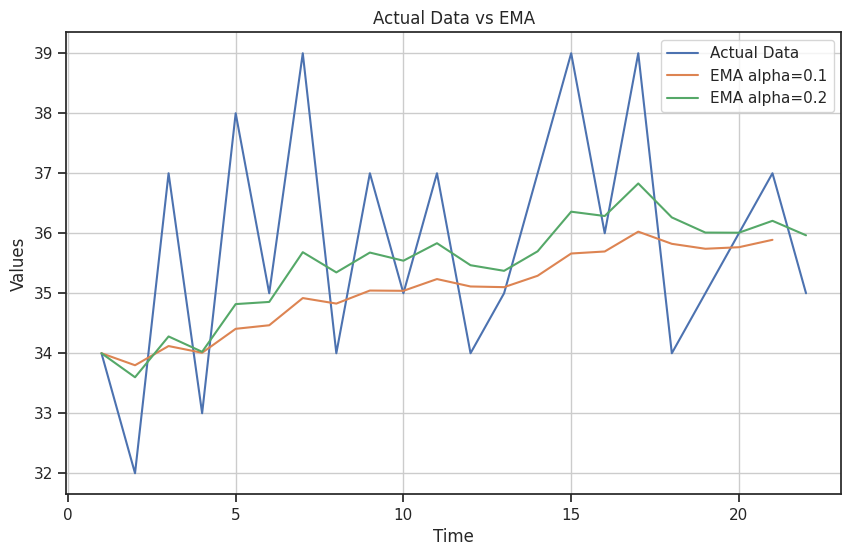

In [639]:
plt.figure(figsize=(10, 6))
plt.plot(data[1], label='Actual Data')
plt.plot(data['predicted_values0.1'], label='EMA alpha=0.1')
plt.plot(data['y_exp_norm_user0.2'], label='EMA alpha=0.2')
plt.legend()
plt.title('Actual Data vs EMA')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid()
plt.show()

In [640]:
data.loc[[5]]

,0,1,y_exp_norm_user0.2,predicted_values0.1
5,5,38,34.8192,34.4072


In [641]:
forecast = model.forecast(1)

In [642]:
forecast

23    35.801491
dtype: float64

## Тренды

Линейный, полиномиальный, экспоненциальный, логарифмический

Аналитические функции для определения тренда \
Линейная $f(x) = a+bx $ \
Полиномиальная $f(x) = a + b_{1}x + b_{2}{x^2} + b_{k}{x^k} $ \
Экспоненциальная $f(x) = c{e^{a+bx}}$ \
Логарифмическая $f(x) = a*log_{b}x+c $

Рассмотрим линейный и логарифмические тренды

In [643]:
 # import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [644]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/DPO/Data_for_exercise_3_task_2.csv', sep = ';')

#view the dataset
data.head()

,X,Y
0,1,2
1,2,15
2,3,15
3,4,33
4,5,33


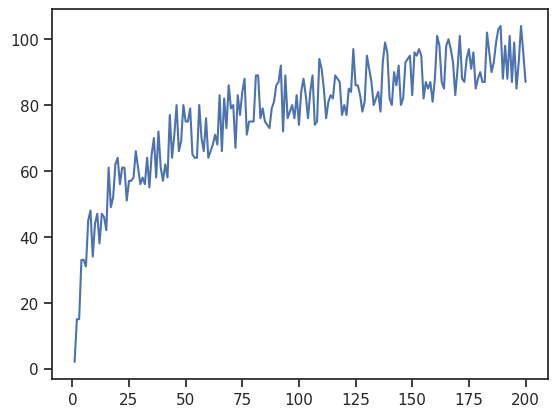

In [645]:
plt.plot('X', 'Y', data=data)
plt.show()

$y_{i}$ - значения временного ряда в момент времени i \
$f_{i}$ - значения тренда в момент времени i \
$y_{avg}$ - среднее значение элементов временного ряда

### Линейный тренд

In [646]:
# Модель линейной регрессии
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        # Добавляем столбец единиц к матрице X для учета свободного члена (bias)
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)

        # Решаем систему линейных уравнений для нахождения весов
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        # using MSE

        # После нахождения весов, можно также вычислить bias
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        # Применяем обученную модель к новым данным
        y_pred = self.bias + np.dot(X, self.weights)
        return y_pred

In [647]:
# Пример использования модели линейной регрессии
# Создаем случайные данные
X = np.array([[i] for i in data['X']])
Y = np.array([[i] for i in data['Y']])

In [648]:
# Создаем и обучаем модель
model = LinearRegression()
model.fit(X, Y)

In [649]:
import numpy as np

# Функция для расчета средней абсолютной ошибки (MAE)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Функция для расчета среднеквадратической ошибки (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Функция для расчета средней абсолютной процентной ошибки (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [650]:
# Вычисляем прогнозы
y_pred = model.predict(X)

# Вычисляем метрики качества
mae = calculate_mae(Y, y_pred)
mse = calculate_mse(Y, y_pred)
mape = calculate_mape(Y, y_pred)

# Выводим результаты
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

MAE: 6.980627818195455
MSE: 90.50156949298733
MAPE: 23.919345994015156


MAE, MSE, MAPE можно использовать в градиентном спуске как функцию потерь

In [651]:
intercept = model.bias
slope = model.weights[0]
print("Intercept:", intercept)
print("Slope:", slope)

Intercept: [51.59422111]
Slope: [0.25443561]


In [652]:
len(y_pred)

200

In [653]:
data['LR'] = y_pred

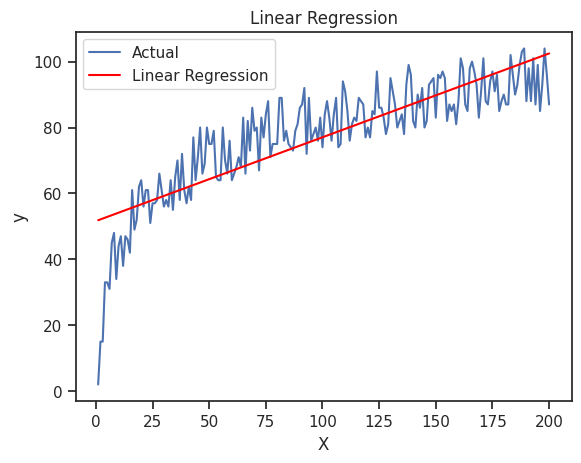

In [654]:
plt.plot(X, Y, label='Actual')
plt.plot(X, data['LR'], color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Залезем под капот линейной регрессии. реализуем свою модель. Используем градиентный спуск и метрику MSE

In [655]:
data = pd.read_csv('/content/drive/MyDrive/DPO/Data_for_exercise_3_task_2.csv', sep = ';')
data['LR'] = y_pred

In [656]:
from sklearn.model_selection import train_test_split

In [657]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [658]:
import numpy as np

class ManualLinearRegression:

    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        #self.loss = loss


    def fit(self, X, Y):

      self.num_samples, self.num_features = X.shape
      self.weights = np.zeros(self.num_features)
      self.bias = 0
      self.X = X
      self.Y = Y

      for _ in range(self.num_iterations):
        self.update_weights()
      return self

    def update_weights(self):

      Y_pred =  self.predict(self.X)
      gradient_weights = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.num_samples
      gradient_bias = - 2 * np.sum( self.Y - Y_pred ) / self.num_features

      self.weights= self.weights - self.learning_rate * gradient_weights
      self.bias = self.bias  - self.learning_rate * gradient_bias

      return self

    def predict(self, X_test):
        Y_pred = X_test.dot(self.weights) + self.bias
        return Y_pred


In [659]:
def main():

  df = data[['X', 'Y']]
  X = df.iloc[:,:-1].values
  Y = df.iloc[:,1].values

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

  model = ManualLinearRegression(num_iterations = 100000, learning_rate = 0.000001 )
  model.fit( X_train, Y_train )
  Y_pred = model.predict( X_test )

  print( "Predicted values ", Y_pred[:3])
  print( "Real values      ", Y_test[:3])
  print( "Trained Weights        ", model.weights[0])
  print( "Trained bias        ", model.bias, 2 )

  # Visualization on test set

  plt.scatter( X_test, Y_test, color = 'blue' )
  plt.plot( X_test, Y_pred, color = 'orange' )
  plt.show()

Predicted values  [55.95384317 95.44275524 79.07564037]
Real values       [ 62 101  75]
Trained Weights         0.25979547417770427
Trained bias         51.017729159868885 2


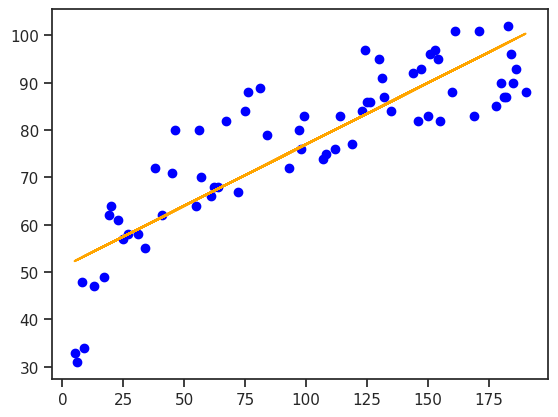

In [660]:
if __name__ == "__main__" :

    main()

In [661]:
Y_pred = model.predict(X)

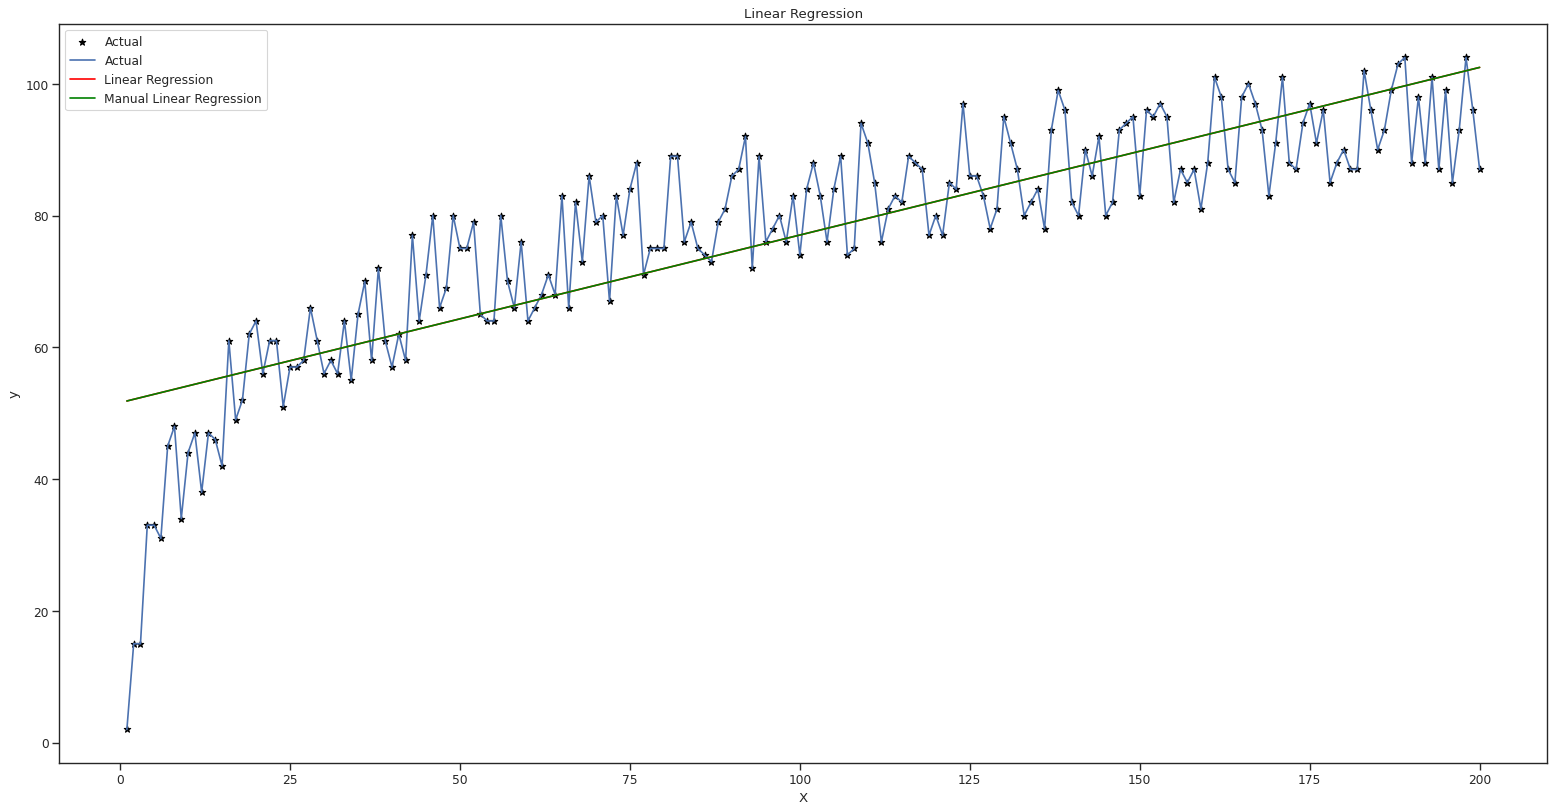

In [662]:
plt.figure(figsize=(24, 12), dpi=80)
plt.scatter(X, Y, label='Actual', color = 'black', marker='*')
plt.plot(X, Y, label='Actual')
plt.plot(data['X'], data['LR'], color='red', label='Linear Regression')
plt.plot(data['X'], Y_pred, color = 'green', label='Manual Linear Regression' )
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Найдем уравнение линейного тренда, используя функцию <code>polyfit</code>
y = ax+b

In [663]:
import numpy as np
X = data['X'].index.to_numpy()
y = data['Y'].to_numpy()
poly = np.polyfit(X, y, 1)
print(poly)
a = round(poly[0], 2)
b = round(poly[1], 2)
print(a, b)

[ 0.25443561 51.84865672]
0.25 51.85


In [670]:
x = np.arange(0, len(data))
data['lin_trend'] = a * x + b
f_i = data['lin_trend']
y_avg = data['Y'].mean()
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()
print(round(R2, 3))

0.704


###Коэффициент детерминации

${R^2} = 1 - \frac {\sum_{i=1}^{n} {(y_{i}-f_{i}})^2}{{\sum_{i=1}^{n} {(y_{i}-y_{avg}})^2}}$

In [664]:
from sklearn.metrics import r2_score

# Рассчитываем R^2
r2_score_value = r2_score(Y, Y_pred)

# Выводим результат
print("Коэффициент детерминации R^2: ", r2_score_value)

Коэффициент детерминации R^2:  0.704521117458941


Рассмотрим еще способ

In [665]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = data[['X', 'Y']]
X = df.iloc[:,:-1].values
X = X.flatten()
Y = df.iloc[:,1].values
Y = Y.flatten()

slope, intercept, r_value, p_value, std_err = linregress(X, Y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 0.254436, intercept: 51.594221
R-squared: 0.704521


### Спрогнозируем следующий член ряда на основе линейного тренда

In [671]:
y_101 = a * 101 + b
round(y_101, 0)

77.0

### Логарифмический тренд

R-squared: 0.8770389389602099


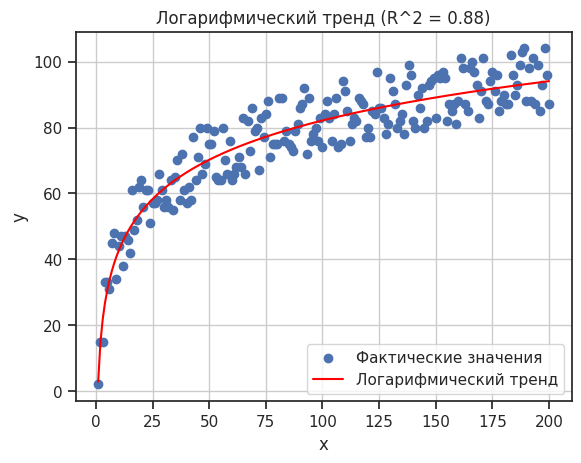

In [510]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Создание исходных данных
x = X
y = Y

# Преобразование x в логарифмическую шкалу
x_log = np.log(x)

# Подгонка модели и предсказание
coefficients = np.polyfit(x_log, y, 1)
y_pred_log = np.polyval(coefficients, x_log)

# Вычисление коэффициента детерминации R^2
r2 = r2_score(y, y_pred_log)
print("R-squared:", r2)
# Построение тренда
plt.scatter(x, y, label='Фактические значения')
plt.plot(x, y_pred_log, color='red', label='Логарифмический тренд')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Логарифмический тренд (R^2 = {r2:.2f})')
plt.grid(True)

# Отображение графика
plt.show()

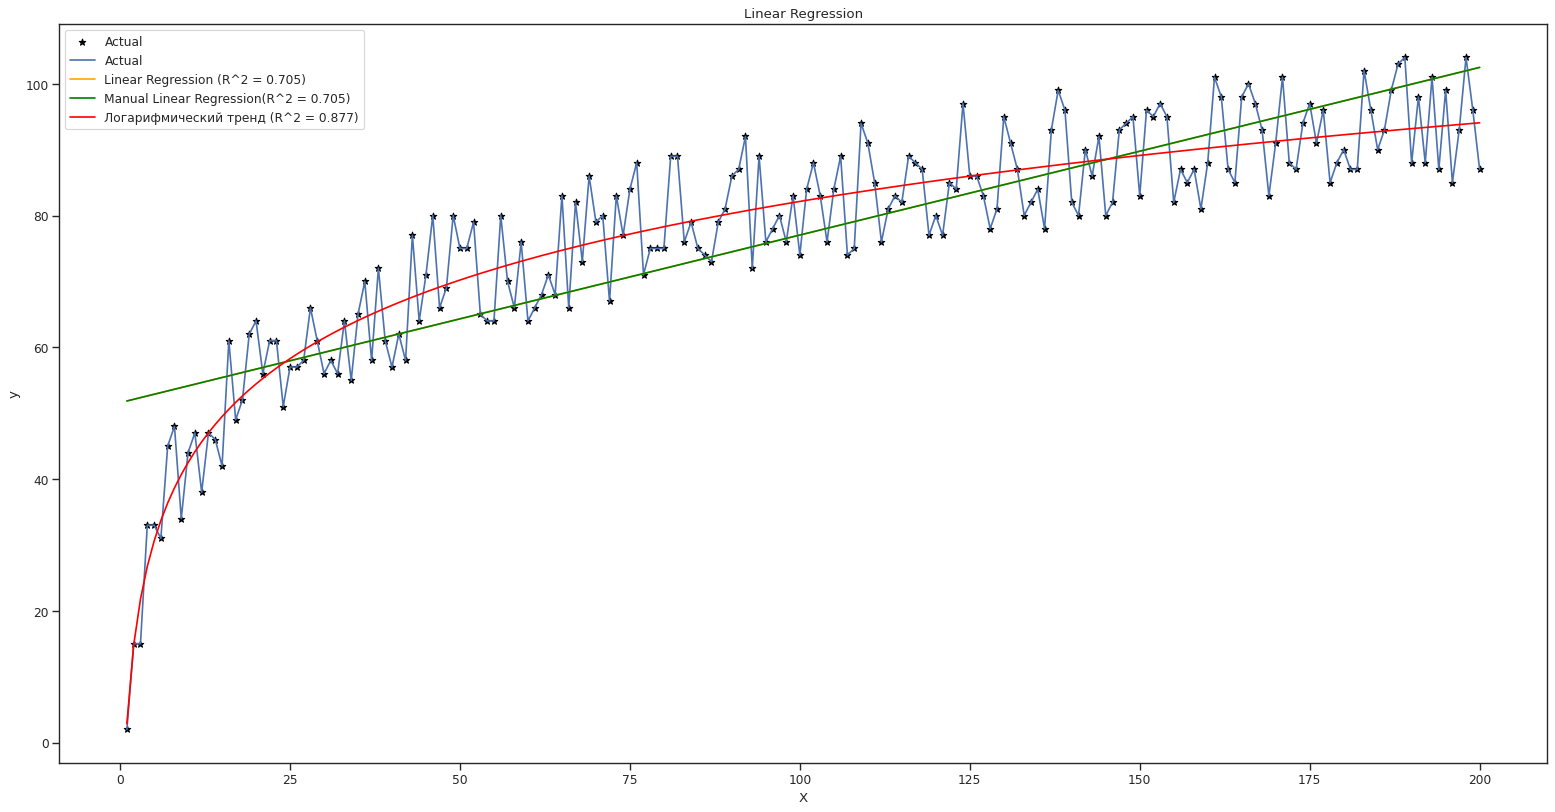

In [519]:
plt.figure(figsize=(24, 12), dpi=80)
plt.scatter(X, Y, label='Actual', color = 'black', marker='*')
plt.plot(X, Y, label='Actual')
plt.plot(data['X'], data['LR'], color='orange', label=f'Linear Regression (R^2 = {round(r_value**2, 3)})')
plt.plot(data['X'], Y_pred, color = 'green', label=f'Manual Linear Regression(R^2 = {round(r2_score_value, 3)})' )
plt.plot(x, y_pred_log, color='red', label=f'Логарифмический тренд (R^2 = {r2:.3f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Определение сезонных компонент временных рядов

Определить аналитическое выражение d(t) для трендовой составляющей временного ряда f(t) \
Выделить сезонную составляющую r(t) = f(t) - d(t) \\
Построить модель для прогнозирования ряда на основе трендовой и сезонных составляющих

Размах может быть постоянным, возрастающим, затухающим

Если вычесть из общей функции функцию тренда, получим сезонную составляющую